In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Parameters
n_rows = 1000
dates = pd.date_range(start="2024-01-01", end="2024-06-30", freq="D")
guest_types = ['Local', 'Tourist']
loyalty_levels = ['None', 'Bronze', 'Silver', 'Gold']
genders = ['Male', 'Female', 'Other']
game_types = ['Slots', 'Table Games', 'Sportsbook']
visit_purposes = ['Vacation', 'Event', 'Spa', 'Business', 'Gambling']

# Create base DataFrame
data = pd.DataFrame({
    'Date': np.random.choice(dates, n_rows),
    'Guest_ID': np.arange(1, n_rows + 1),
    'Guest_Type': np.random.choice(guest_types, n_rows, p=[0.4, 0.6]),
    'Age': np.random.randint(21, 75, size=n_rows),
    'Gender': np.random.choice(genders, n_rows),
    'Loyalty_Status': np.random.choice(loyalty_levels, n_rows, p=[0.3, 0.3, 0.25, 0.15]),
    'Game_Type': np.random.choice(game_types, n_rows),
    'Visit_Purpose': np.random.choice(visit_purposes, n_rows),
    'Length_of_Stay': np.random.choice([1, 2, 3, 4, 5], n_rows, p=[0.2, 0.25, 0.3, 0.15, 0.1]),
    'Used_Comps': np.random.choice(['Yes', 'No'], n_rows, p=[0.3, 0.7])
})

# Derived column
data['Month'] = data['Date'].dt.to_period('M')

# Calculate Casino_Spend
base_spend = (
    50 +
    data['Loyalty_Status'].map({'None': 0, 'Bronze': 20, 'Silver': 40, 'Gold': 60}) +
    data['Guest_Type'].map({'Tourist': 30, 'Local': 0}) +
    np.random.normal(0, 25, size=n_rows)
)
comp_bonus = np.where(data['Used_Comps'] == 'Yes', 20, 0)
stay_bonus = data['Length_of_Stay'] * 5
age_penalty = np.clip((data['Age'] - 60) * -0.5, -20, 0)

data['Casino_Spend'] = np.round(base_spend + comp_bonus + stay_bonus + age_penalty, 2)
data['Casino_Spend'] = data['Casino_Spend'].clip(lower=0)

# Add Comp_Value
data['Comp_Value'] = (
    data['Loyalty_Status'].map({'None': 0, 'Bronze': 10, 'Silver': 25, 'Gold': 50}) +
    np.random.normal(0, 5, size=n_rows)
).clip(lower=0).round(2)

# Add Satisfaction Score
data['Satisfaction_Score'] = np.round(
    6 +
    data['Loyalty_Status'].map({'None': -1, 'Bronze': 0.5, 'Silver': 1, 'Gold': 1.5}) +
    np.random.normal(0, 0.8, size=n_rows), 1
).clip(1, 10)

# Final formatting
data = data.sort_values('Date').reset_index(drop=True)

df = pd.DataFrame(data)
df.head()

,Date,Guest_ID,Guest_Type,Age,Gender,Loyalty_Status,Game_Type,Visit_Purpose,Length_of_Stay,Used_Comps,Month,Casino_Spend,Comp_Value,Satisfaction_Score
0,2024-01-01,855,Local,36,Male,Silver,Sportsbook,Gambling,3,Yes,2024-01,113.23,31.07,4.8
1,2024-01-01,636,Tourist,38,Male,None,Slots,Gambling,3,No,2024-01,92.87,0.00,5.3
2,2024-01-01,123,Local,57,Female,None,Sportsbook,Event,4,No,2024-01,30.45,7.46,3.7
3,2024-01-01,665,Tourist,74,Female,Bronze,Sportsbook,Gambling,3,No,2024-01,109.22,6.69,5.7
4,2024-01-01,439,Tourist,69,Male,Bronze,Slots,Gambling,1,No,2024-01,92.31,5.77,6.1


In [8]:
df['Date'] = pd.to_datetime(df['Date'])  # if not already datetime
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
df['Out_of_state'] = df['Guest_Type'] == 'Tourist'
df['Casino_Spend'] += np.random.normal(0, 15, len(df))

In [9]:
Casino_Revenue_Trend=df.groupby(['Month'])['Casino_Spend'].sum().reset_index()
Guest_Casino_Revenue=df.groupby(['Guest_Type'])['Casino_Spend'].mean().reset_index()
Age_Revenue=df.groupby(['Age_Group'])['Casino_Spend'].mean().reset_index()
Satisfaction_Trend=df.groupby(['Month'])['Satisfaction_Score'].mean().reset_index()
Length_Stay_Revenue=df.groupby('Length_of_Stay')['Casino_Spend'].mean().reset_index()

C:\Users\logan\AppData\Local\Temp\ipykernel_10120\65098225.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Revenue=df.groupby(['Age_Group'])['Casino_Spend'].mean().reset_index()


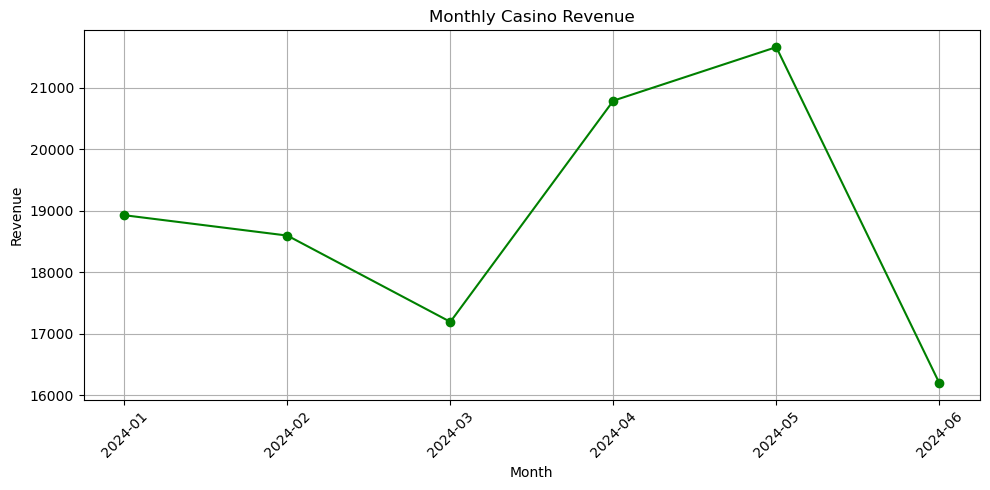

In [10]:
Casino_Revenue_Trend=df.groupby(['Month'])['Casino_Spend'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(Casino_Revenue_Trend['Month'], Casino_Revenue_Trend['Casino_Spend'],marker='o',color='green')
plt.title('Monthly Casino Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Between the months of Jan-April(Q1) casino revenue was steady, but then drastically declined going into May.
What caused this decline?

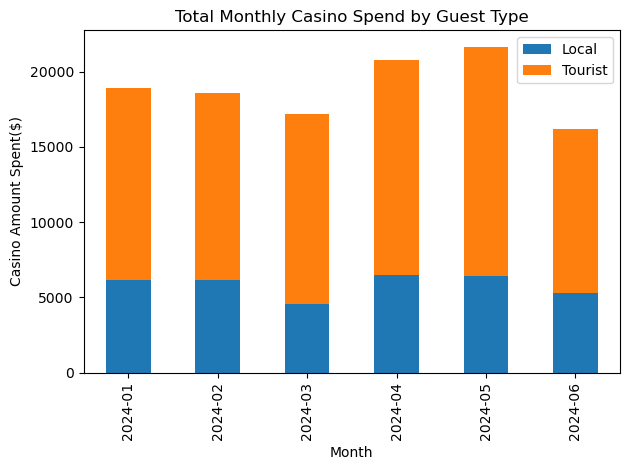

In [11]:
Guest_Casino_Revenue=df.groupby(['Month','Guest_Type'])['Casino_Spend'].sum().reset_index()
Guest_Casino_Revenue_Pivot=Guest_Casino_Revenue.pivot(index='Month',columns='Guest_Type',values='Casino_Spend')
Guest_Casino_Revenue_Pivot.plot(kind='bar',stacked=True)
plt.title('Total Monthly Casino Spend by Guest Type')
plt.xlabel('Month')
plt.ylabel('Casino Amount Spent($)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\logan\AppData\Local\Temp\ipykernel_10120\1631541068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Revenue=df.groupby(['Month','Age_Group'])['Casino_Spend'].sum().reset_index()


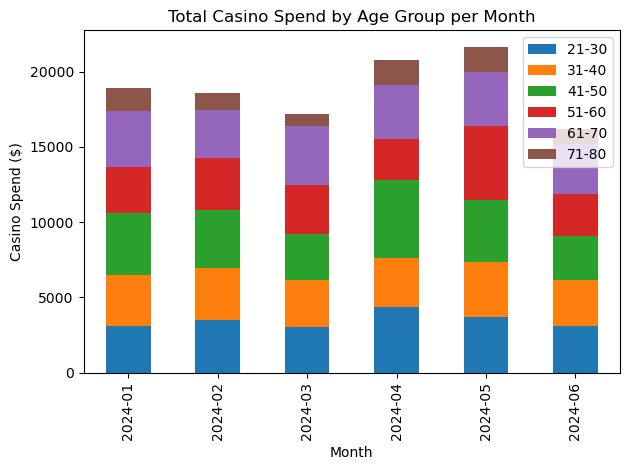

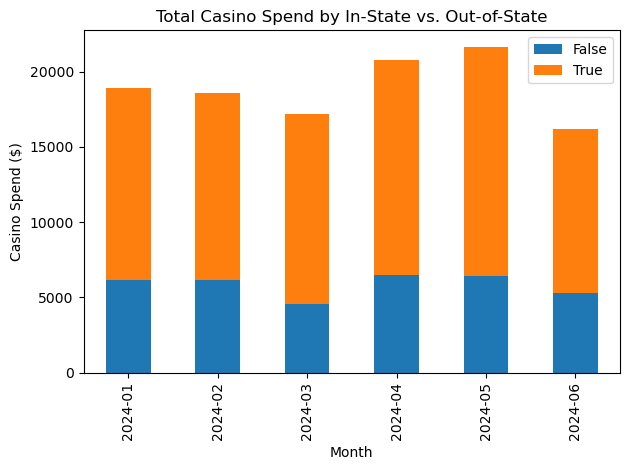

In [12]:
Age_Revenue=df.groupby(['Month','Age_Group'])['Casino_Spend'].sum().reset_index()
Local_Revenue=df.groupby(['Month','Out_of_state'])['Casino_Spend'].sum().reset_index()

Age_Revenue_Pivot=Age_Revenue.pivot(index='Month',columns='Age_Group',values='Casino_Spend')
Local_Revenue_Pivot=Local_Revenue.pivot(index='Month',columns='Out_of_state',values='Casino_Spend')

Age_Revenue_Pivot.plot(kind='bar',stacked=True)
plt.title('Total Casino Spend by Age Group per Month')
plt.xlabel('Month')
plt.ylabel('Casino Spend ($)')
plt.legend()
plt.tight_layout()
plt.show()


Local_Revenue_Pivot.plot(kind='bar', stacked=True)
plt.title('Total Casino Spend by In-State vs. Out-of-State')
plt.xlabel('Month')
plt.ylabel('Casino Spend ($)')
plt.legend()
plt.tight_layout()
plt.show()